In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy
import sklearn
import scipy
import pylab as plt
import random


### Some PCA and dimensino reduction worksheet

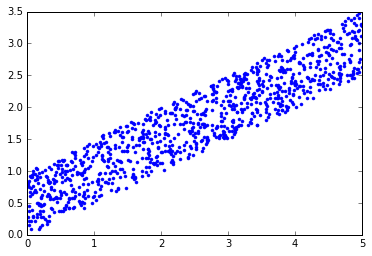

In [5]:
# make some data:
R1 = random.Random()
R2 = random.Random()
#
N_points = 1000
b_slope =.5
dx_dy = 5.
#
datas = []
for j in range(N_points):
    x = dx_dy*R1.random()
    y = R2.random() + b_slope*x
    #
    datas += [[x,y]]
#
datas = numpy.array(datas)
XY = datas
plt.figure()
ax1=plt.gca()
plt.plot(*zip(*datas), ls='', marker='.')

### PCA:
- First, get the covariance matrix. this is:
  - X_m = X - <X>_{col}
  - cov = $X_m^TX_m$
  - or: cov = numpy.cov(X)
- Then, get eigen-values $\lambda_j$ and eigen-vectors $\vec{e}_j$ of the covariance matrix.
  - you can do this manually (see any linear algebra text or Wikipedia)
  - ... or use numpy: numpy.linalbe.eig(X).
  - there are variations on .eig(), including Hermitian, .eigh(), etc. that make various assumptions about the symmetry and values in the matrix.
  

In [6]:
# now, pca it:
#
cov_xy = numpy.cov(datas.T)
lambdas, eigvs = numpy.linalg.eigh(cov_xy)

print(lambdas, numpy.sqrt(lambdas[1]/lambdas[0]))
print(eigvs)

[ 0.06912543  2.61283391] 6.14804397043
[[ 0.45227015 -0.89188099]
 [-0.89188099 -0.45227015]]


### More getting pca:
- "pca" is the covariance eigen-vectors sorted by corresponding eigen-value.
- the largest eigenvalue indicates the axis with the largest variability (presumably the largest 'signal').
- The $m \times m$ matrix made up of the eigen-vectors as columns is a rotation matrix to (??) the PCA frame
- Sort the eigen-values/vectors by eigen-value;
- keep the largest N pairs; this is an $m~x~n$ matrix, no longer square, but note that the columns have the same number of elements (rows) as the data points in the original data set.
- If so desired, the eigen-values can be used to re-scale the data along the principla axes, but this is not very commonly done.

- now, "dot" the data onto the reduced basis (compute the projection of these data onto the new, reduced basis). If we keep the entire basis, this is effectively a rotation into the PCA frame.
- Then, rotate the reduced data back to the original frame using the original PCA matrix.

In [7]:
#print(pca_R)
pcas = sorted(zip(lambdas, eigvs), key=lambda rw: rw[0])
print('pcas: ', pcas)

e_vals = [rw[0] for rw in pcas]
A_pca = numpy.array([rw[1] for rw in pcas])
print('**', A_pca)
#
# reduced basis
A_pca_r = A_pca[-1:]
#
print('A_pca:   {}'.format(A_pca))
print('A_pca_r: {}'.format(A_pca_r))
#
# data transformed onto the reduced basis:
XY_prime = numpy.dot(XY, A_pca_r.T)
#print('**', numpy.dot(XY, A_pca_r.T))
#
# now, rotate reduced data back to original frame.
XY_prime2 = numpy.dot(XY_prime, A_pca_r)
#

pcas:  [(0.069125434382115103, array([ 0.45227015, -0.89188099])), (2.6128339062564652, array([-0.89188099, -0.45227015]))]
** [[ 0.45227015 -0.89188099]
 [-0.89188099 -0.45227015]]
A_pca:   [[ 0.45227015 -0.89188099]
 [-0.89188099 -0.45227015]]
A_pca_r: [[-0.89188099 -0.45227015]]


vec:  2.61283390626 [-0.89188099 -0.45227015]
vec:  0.0691254343821 [ 0.45227015 -0.89188099]


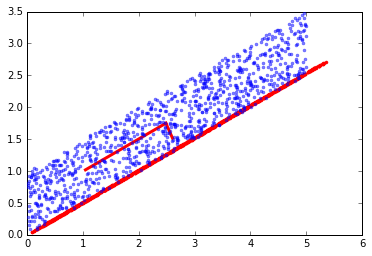

In [37]:
plt.figure()
#
# plot basis vectors:
for lamb, vec in reversed(sorted(zip(lambdas, eigvs), key=lambda rw: rw[0])):
    print('vec: ', lamb, vec)
    #plt.arrow(x=0.,y=0., dx=10*lamb*vec[0], dy=10*lamb*vec[1], lw=2.5, zorder=11, ls='-', color='m')
    #plt.arrow(0., 0., .89, .45)
    #plt.arrow(.8,.8,-0.89188099,-0.45227015)
    #plt.plot(*zip(numpy.zeros(len(vec)), lamb*vec), ls='-', lw=2., color=None)
    d_center = numpy.array([numpy.mean(col) for col in zip(*XY)])
    plt.plot(*zip(d_center, numpy.sqrt(lamb)*vec + d_center), ls='-', lw=3., color='r')
#plt.figure()
plt.plot(*zip(*datas), ls='', marker='.', color='b', zorder=4, alpha=.5)
plt.plot(*zip(*XY_prime2), marker='.', ls='', color='r')
#print('dot: {}'.format(numpy.dot(A_pca, XY.T)))

In [ ]:
print(XY[0:5])